In [1]:
# Competição Kaggle: Housing Prices Competition for Kaggle Learn Users
# https://www.kaggle.com/competitions/home-data-for-ml-course


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('kaggle/input/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('kaggle/input/home-data-for-ml-course/test.csv')

In [2]:
train_data.shape

(1460, 81)

In [3]:
test_data.shape

(1459, 80)

In [4]:
train_data.shape[0]

1460

In [5]:
train_data.shape[1]

81

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# ANALISE EXPLORATORIA

In [8]:
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [9]:
train_data['SalePrice'].min()

34900

In [10]:
train_data['SalePrice'].mean()

180921.19589041095

In [11]:
train_data['SalePrice'].median()

163000.0

In [12]:
train_data['SalePrice'].max()

755000

In [13]:
train_data['SalePrice'].std()

79442.50288288662

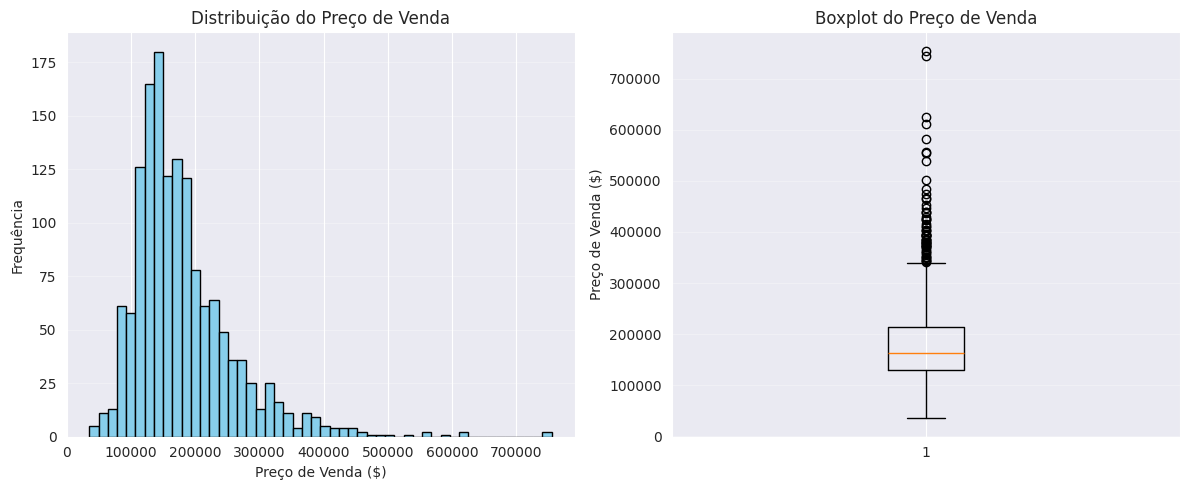

In [14]:
# Visualização da distribuição do preço
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_data['SalePrice'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Preço de Venda ($)')
plt.ylabel('Frequência')
plt.title('Distribuição do Preço de Venda')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_data['SalePrice'], vert=True)
plt.ylabel('Preço de Venda ($)')
plt.title('Boxplot do Preço de Venda')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ANALISAR VALORES NULL

In [15]:
# Calcular percentual
missing_train = train_data.isnull().sum()
missing_percent = (missing_train / len(train_data)) * 100
missing_data = pd.DataFrame({
    'Coluna': missing_train.index,
    'Valores Ausentes': missing_train.values,
    'Percentual (%)': missing_percent.values
})
missing_data = missing_data[missing_data['Valores Ausentes'] > 0].sort_values(
    'Valores Ausentes', ascending=False
)

In [16]:
{len(missing_data)}


{19}

In [17]:
missing_data.head(10)

,Coluna,Valores Ausentes,Percentual (%)
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945


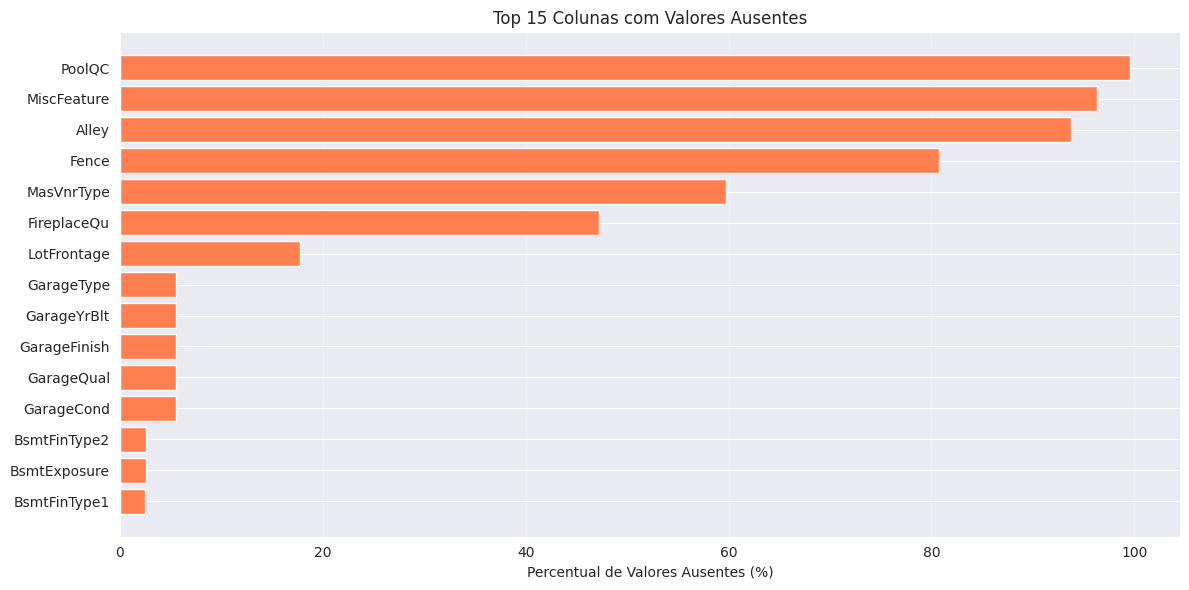

In [18]:
plt.figure(figsize=(12, 6))
top_missing = missing_data.head(15)
plt.barh(top_missing['Coluna'], top_missing['Percentual (%)'], color='coral')
plt.xlabel('Percentual de Valores Ausentes (%)')
plt.title('Top 15 Colunas com Valores Ausentes')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# SELECIONAR FEATURES

In [19]:
y = train_data['SalePrice'] # nosso target




In [20]:
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')

In [21]:
len(numeric_features)

36

In [22]:
for i, feature in enumerate(numeric_features, 1):
    print(f"{i}. {feature}")

1. MSSubClass
2. LotFrontage
3. LotArea
4. OverallQual
5. OverallCond
6. YearBuilt
7. YearRemodAdd
8. MasVnrArea
9. BsmtFinSF1
10. BsmtFinSF2
11. BsmtUnfSF
12. TotalBsmtSF
13. 1stFlrSF
14. 2ndFlrSF
15. LowQualFinSF
16. GrLivArea
17. BsmtFullBath
18. BsmtHalfBath
19. FullBath
20. HalfBath
21. BedroomAbvGr
22. KitchenAbvGr
23. TotRmsAbvGrd
24. Fireplaces
25. GarageYrBlt
26. GarageCars
27. GarageArea
28. WoodDeckSF
29. OpenPorchSF
30. EnclosedPorch
31. 3SsnPorch
32. ScreenPorch
33. PoolArea
34. MiscVal
35. MoSold
36. YrSold


In [23]:
# Criar conjunto X com características numéricas
X = train_data[numeric_features].copy()

X.shape
y.shape


(1460,)

X (1460, 36)
Y (1460, )

In [24]:
# Calcular correlação
correlations = train_data[numeric_features + ['SalePrice']].corr()['SalePrice'].sort_values(
    ascending=False
)

correlations.head(11)[1:11] # excluir a própria SalePrice

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 características mais correlacionadas com SalePrice:
OverallQual     0.790982


GrLivArea       0.708624

GarageCars      0.640409

GarageArea      0.623431

TotalBsmtSF     0.613581

1stFlrSF        0.605852

FullBath        0.560664

TotRmsAbvGrd    0.533723

YearBuilt       0.522897

YearRemodAdd    0.507101

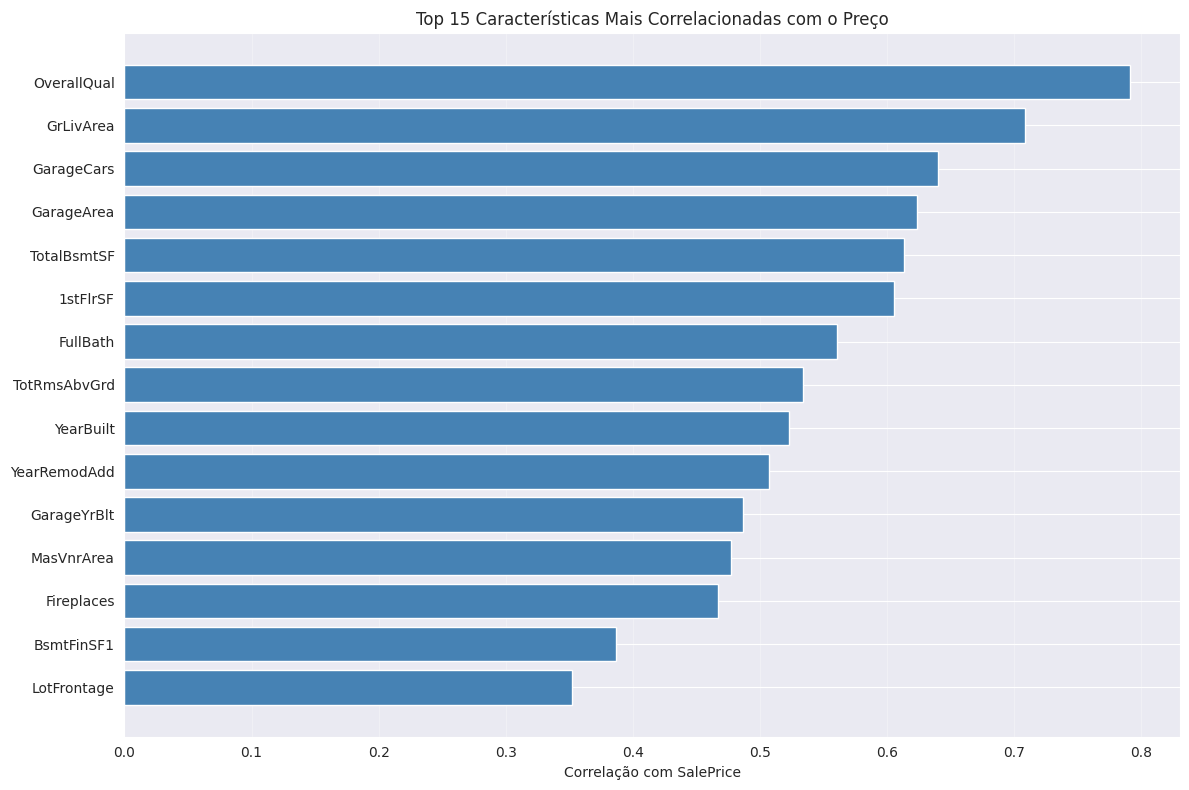

In [25]:
# Visualizar correlações
plt.figure(figsize=(12, 8))
top_corr = correlations.head(16)[1:16]  # Top 15 excluindo SalePrice
plt.barh(range(len(top_corr)), top_corr.values, color='steelblue')
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlação com SalePrice')
plt.title('Top 15 Características Mais Correlacionadas com o Preço')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

OverallQual é a mais relacionada, seguindo por: GrLivArea, GarageCArs, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd

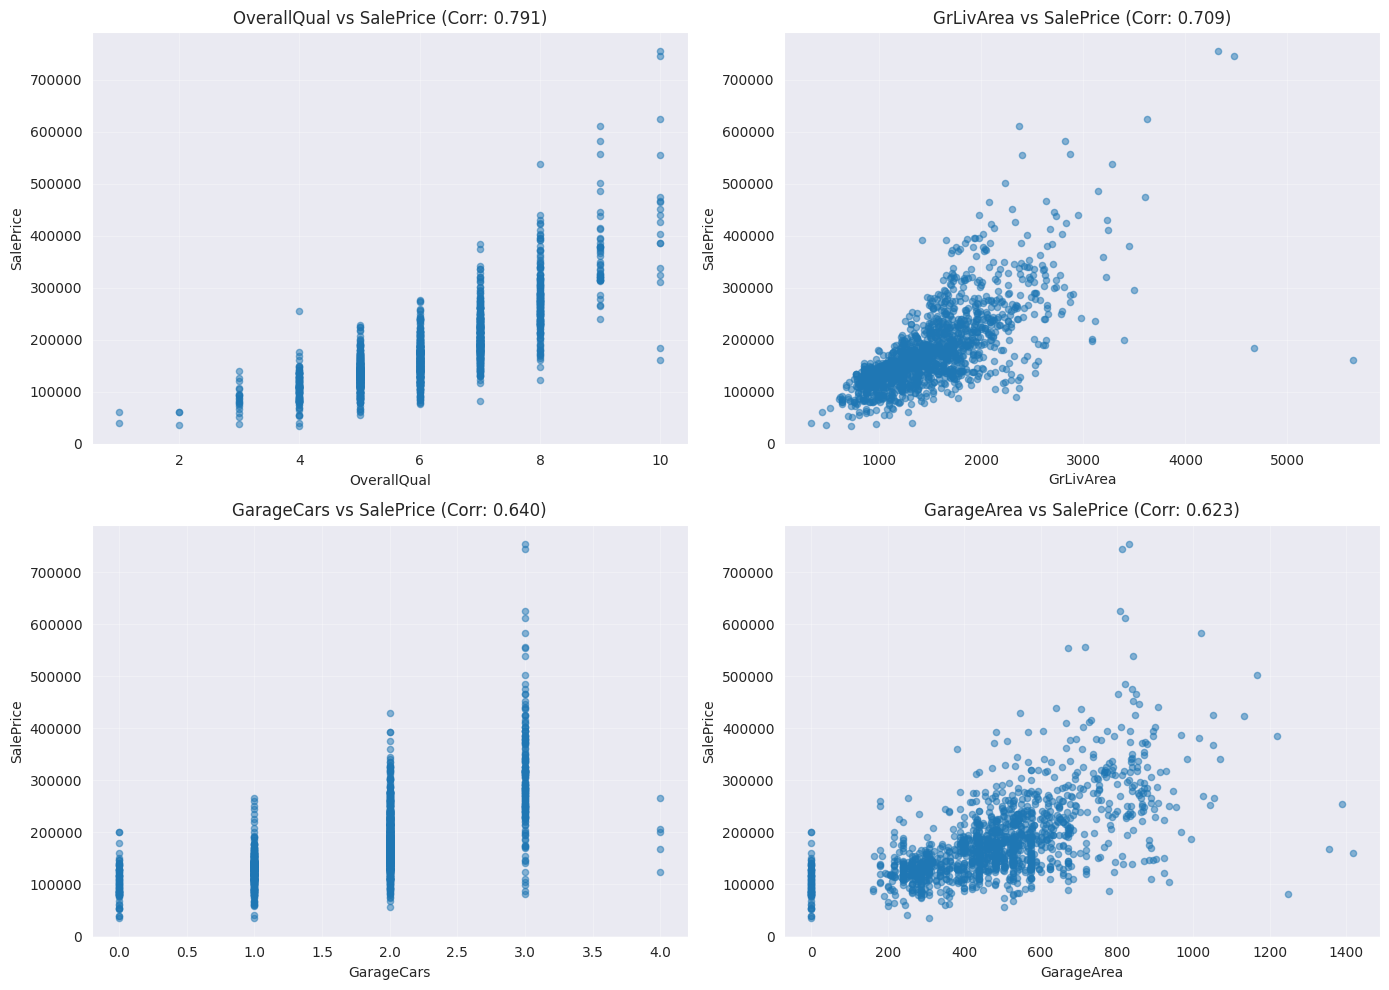

In [26]:
# Scatter plots das top 4 características
top_4_features = correlations.head(5)[1:5].index.tolist()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_4_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5, s=20)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice (Corr: {correlations[feature]:.3f})')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# TRATANDO VALORES NULL

In [27]:
print(X.isnull().sum().sum())

348


In [28]:
# Utilizar SimpleImputer para preencher valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print(X_imputed.isnull().sum().sum())


0


In [29]:
# Dividir em treino (80%) e validação (20%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

print(f"\nConjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de validação: {X_valid.shape[0]} amostras")


Conjunto de treino: 1168 amostras
Conjunto de validação: 292 amostras


# NORMALIZANDO OS DADOS

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print("\nDados normalizados com sucesso!")
print(f"Média das características (treino após normalização): {X_train_scaled.mean():.6f}")
print(f"Desvio padrão (treino após normalização): {X_train_scaled.std():.6f}")


Dados normalizados com sucesso!
Média das características (treino após normalização): 0.000000
Desvio padrão (treino após normalização): 1.000000


# TREINANDO MODELOS

In [31]:
# Dicionário para armazenar modelos e resultados
models = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
}

results = {}

In [32]:
# Treinar e avaliar cada modelo
for name, model in models.items():
    print(f"\n--- {name} ---")

    # Treinar o modelo
    model.fit(X_train_scaled, y_train)

    # Fazer predições
    y_train_pred = model.predict(X_train_scaled)
    y_valid_pred = model.predict(X_valid_scaled)

    # Calcular métricas
    train_mae = mean_absolute_error(y_train, y_train_pred)
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Armazenar resultados
    results[name] = {
        'train_mae': train_mae,
        'valid_mae': valid_mae,
        'train_rmse': train_rmse,
        'valid_rmse': valid_rmse,
        'train_r2': train_r2,
        'valid_r2': valid_r2,
        'predictions': y_valid_pred
    }

    print(f"MAE (Treino): ${train_mae:,.2f}")
    print(f"MAE (Validação): ${valid_mae:,.2f}")
    print(f"RMSE (Treino): ${train_rmse:,.2f}")
    print(f"RMSE (Validação): ${valid_rmse:,.2f}")
    print(f"R² (Treino): {train_r2:.4f}")
    print(f"R² (Validação): {valid_r2:.4f}")


--- Regressão Linear ---
MAE (Treino): $21,066.67
MAE (Validação): $22,975.86
RMSE (Treino): $33,920.14
RMSE (Validação): $36,836.91
R² (Treino): 0.8071
R² (Validação): 0.8231

--- Árvore de Decisão ---
MAE (Treino): $5,168.92
MAE (Validação): $26,212.29
RMSE (Treino): $8,070.05
RMSE (Validação): $38,215.13
R² (Treino): 0.9891
R² (Validação): 0.8096

--- Random Forest ---
MAE (Treino): $6,862.57
MAE (Validação): $18,067.69
RMSE (Treino): $11,400.32
RMSE (Validação): $29,374.52
R² (Treino): 0.9782
R² (Validação): 0.8875


# COMPARAÇÃO DE MODELOS

In [33]:
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'MAE (Treino)': [results[m]['train_mae'] for m in results.keys()],
    'MAE (Validação)': [results[m]['valid_mae'] for m in results.keys()],
    'RMSE (Validação)': [results[m]['valid_rmse'] for m in results.keys()],
    'R² (Validação)': [results[m]['valid_r2'] for m in results.keys()]
})

print("\n", results_df.to_string(index=False))


            Modelo  MAE (Treino)  MAE (Validação)  RMSE (Validação)  R² (Validação)
 Regressão Linear  21066.668644     22975.856509      36836.908846        0.823090
Árvore de Decisão   5168.918329     26212.294355      38215.133990        0.809604
    Random Forest   6862.565179     18067.688109      29374.523775        0.887506


Modelo  MAE (Treino)  MAE (Validação)  RMSE (Validação)  R² (Validação)

Regressão Linear  21066.668644     22975.856509      36836.908846        0.823090

Árvore de Decisão   5168.918329     26212.294355      38215.133990        0.809604

Random Forest   6862.565179     18067.688109      29374.523775        0.887506

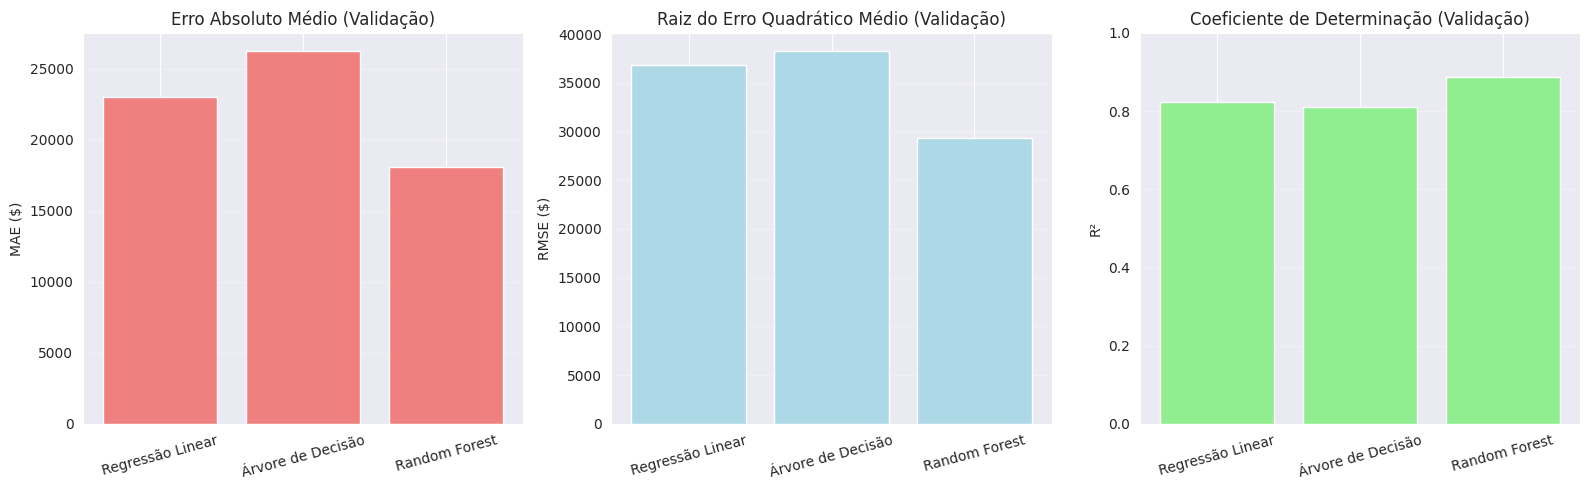

In [34]:
# Visualizar comparação
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# MAE
axes[0].bar(results_df['Modelo'], results_df['MAE (Validação)'], color='lightcoral')
axes[0].set_ylabel('MAE ($)')
axes[0].set_title('Erro Absoluto Médio (Validação)')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', alpha=0.3)
# RMSE
axes[1].bar(results_df['Modelo'], results_df['RMSE (Validação)'], color='lightblue')
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Raiz do Erro Quadrático Médio (Validação)')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)
# R²
axes[2].bar(results_df['Modelo'], results_df['R² (Validação)'], color='lightgreen')
axes[2].set_ylabel('R²')
axes[2].set_title('Coeficiente de Determinação (Validação)')
axes[2].tick_params(axis='x', rotation=15)
axes[2].set_ylim([0, 1])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# melhor modelo (menor MAE)
best_model_name = results_df.loc[results_df['MAE (Validação)'].idxmin(), 'Modelo']
best_model_name

'Random Forest'

Random forest foi o melhor modelo

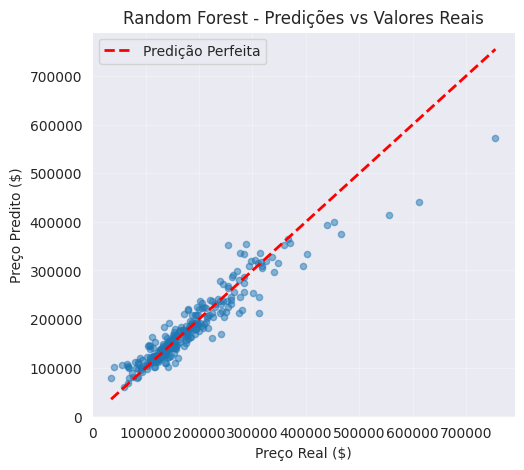

In [36]:
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_valid, best_predictions, alpha=0.5, s=20)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],
         'r--', lw=2, label='Predição Perfeita')
plt.xlabel('Preço Real ($)')
plt.ylabel('Preço Predito ($)')
plt.title(f'{best_model_name} - Predições vs Valores Reais')
plt.legend()
plt.grid(alpha=0.3)

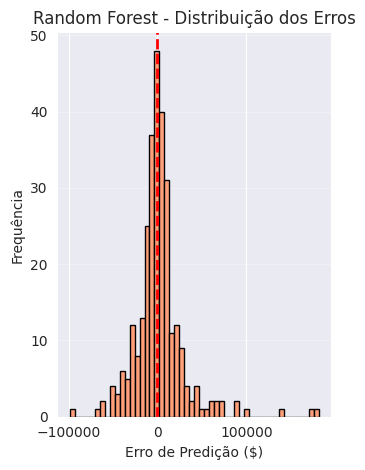

In [37]:
# Distribuição dos erros
plt.subplot(1, 2, 2)
errors = y_valid - best_predictions
plt.hist(errors, bins=50, edgecolor='black', color='lightsalmon')
plt.xlabel('Erro de Predição ($)')
plt.ylabel('Frequência')
plt.title(f'{best_model_name} - Distribuição dos Erros')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
errors.mean()
errors.median()
errors.std()

29371.501797099623

Erro médio: USD1,769.73
Erro mediano: USD116.50
Desvio padrão dos erros: USD29,371.50

# FEATURES MAIS IMPORTANTES

IMPORTÂNCIA DAS FEATURES

Top 15 características mais importantes:
         Feature  Importance
3    OverallQual    0.563411
15     GrLivArea    0.125221
11   TotalBsmtSF    0.038312
13      2ndFlrSF    0.035510
8     BsmtFinSF1    0.033542
12      1stFlrSF    0.030013
2        LotArea    0.021628
26    GarageArea    0.019133
5      YearBuilt    0.017838
25    GarageCars    0.013711
1    LotFrontage    0.010500
6   YearRemodAdd    0.010158
24   GarageYrBlt    0.008321
22  TotRmsAbvGrd    0.007909
28   OpenPorchSF    0.007567


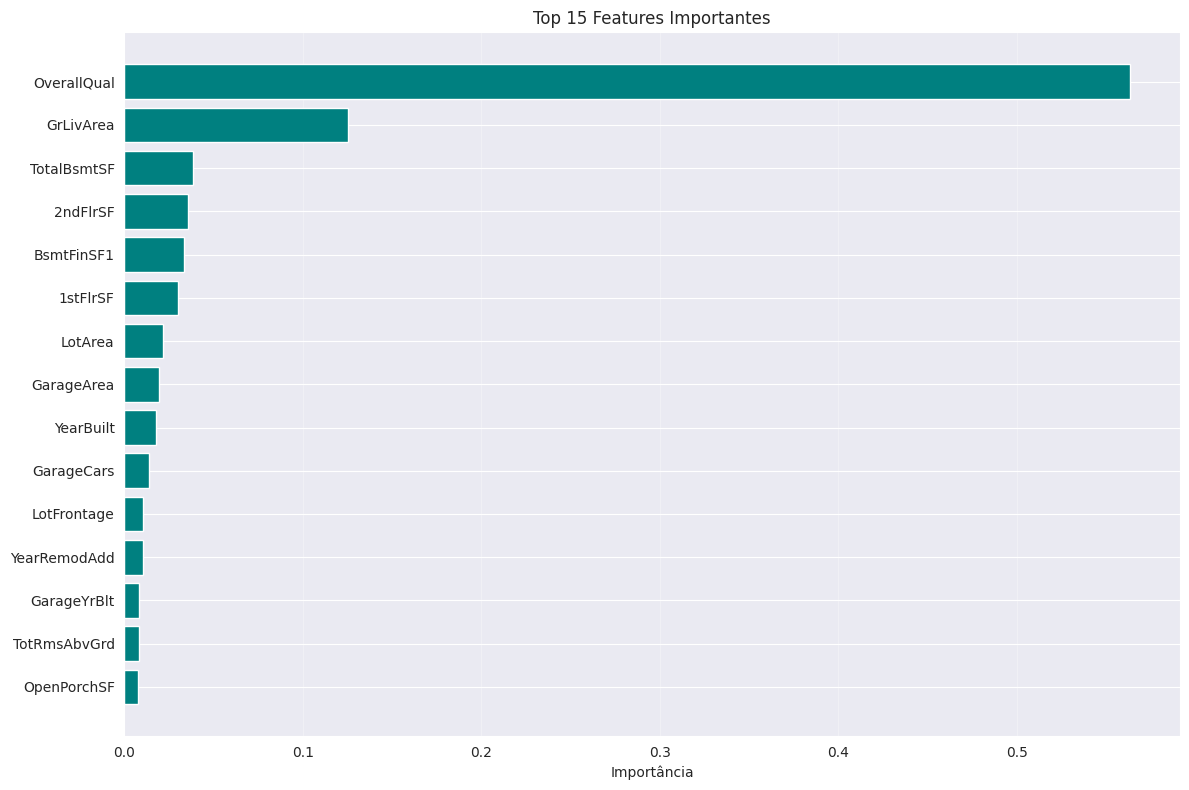

In [39]:

if best_model_name == 'Random Forest':
    print("IMPORTÂNCIA DAS FEATURES")

    # Obter importâncias
    best_model = models[best_model_name]
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 15 características mais importantes:")
    print(feature_importance.head(15))

    # Visualizar
    plt.figure(figsize=(12, 8))
    top_15 = feature_importance.head(15)
    plt.barh(range(len(top_15)), top_15['Importance'].values, color='teal')
    plt.yticks(range(len(top_15)), top_15['Feature'].values)
    plt.xlabel('Importância')
    plt.title('Top 15 Features Importantes')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

Feature  Importance

3    OverallQual    0.563411

15     GrLivArea    0.125221

11   TotalBsmtSF    0.038312

13      2ndFlrSF    0.035510

8     BsmtFinSF1    0.033542

12      1stFlrSF    0.030013

2        LotArea    0.021628

26    GarageArea    0.019133

5      YearBuilt    0.017838

25    GarageCars    0.013711

1    LotFrontage    0.010500

6   YearRemodAdd    0.010158

24   GarageYrBlt    0.008321

22  TotRmsAbvGrd    0.007909

28   OpenPorchSF    0.007567

# PREPARAR DADOS DE TESTE

In [40]:
X_test = test_data[numeric_features].copy()

# Aplicar imputação
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [41]:
#normalizando
X_test_scaled = scaler.transform(X_test_imputed)

print(f"\nDados de teste preparados: {X_test_scaled.shape[0]} amostras")


Dados de teste preparados: 1459 amostras


In [42]:
best_model = models[best_model_name]
test_predictions = best_model.predict(X_test_scaled)

print(f"\nPredições geradas para {len(test_predictions)} casas")
print(f"Preço médio predito: ${test_predictions.mean():,.2f}")
print(f"Preço mínimo predito: ${test_predictions.min():,.2f}")
print(f"Preço máximo predito: ${test_predictions.max():,.2f}")


Predições geradas para 1459 casas
Preço médio predito: $178,798.41
Preço mínimo predito: $62,304.43
Preço máximo predito: $488,566.07


# SUBMISSÃO

In [43]:
# Criar DataFrame de submissão
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})


In [44]:
submission.to_csv('kaggle/working/submission.csv', index=False)

print(submission.head(10))

     Id      SalePrice
0  1461  131029.353269
1  1462  156446.723156
2  1463  179000.219557
3  1464  183827.155624
4  1465  207225.560000
5  1466  183134.260838
6  1467  174018.608081
7  1468  174931.020850
8  1469  178773.712452
9  1470  119787.631190


In [46]:
print(f"""
ETAPAS CONCLUÍDAS:
1. ✓ Carregamento dos dados
2. ✓ Análise exploratória
3. ✓ Identificação de valores ausentes
4. ✓ Seleção de características numéricas
5. ✓ Análise de correlação
6. ✓ Tratamento de valores ausentes
7. ✓ Divisão treino/validação
8. ✓ Normalização dos dados
9. ✓ Treinamento de múltiplos modelos
10. ✓ Comparação de desempenho
11. ✓ Análise do melhor modelo
12. ✓ Geração de predições
13. ✓ Criação do arquivo de submissão

MELHOR MODELO: {best_model_name}
MAE (Validação): ${results[best_model_name]['valid_mae']:,.2f}
RMSE (Validação): ${results[best_model_name]['valid_rmse']:,.2f}
R² (Validação): {results[best_model_name]['valid_r2']:.4f}
""")


ETAPAS CONCLUÍDAS:
1. ✓ Carregamento dos dados
2. ✓ Análise exploratória
3. ✓ Identificação de valores ausentes
4. ✓ Seleção de características numéricas
5. ✓ Análise de correlação
6. ✓ Tratamento de valores ausentes
7. ✓ Divisão treino/validação
8. ✓ Normalização dos dados
9. ✓ Treinamento de múltiplos modelos
10. ✓ Comparação de desempenho
11. ✓ Análise do melhor modelo
12. ✓ Geração de predições
13. ✓ Criação do arquivo de submissão

MELHOR MODELO: Random Forest
MAE (Validação): $18,067.69
RMSE (Validação): $29,374.52
R² (Validação): 0.8875

